<a href="https://colab.research.google.com/github/18sarru/Deihl_model-SNN/blob/main/diehl_vowels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install brian2
!pip install brian2tools


     |████████████████████████████████| 1.2 MB 4.3 MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257195 sha256=9a9a953e989b081b6c1973e6829e2dea62225cdf8f339faeafef6df2f1741d6b
  Stored in directory: /root/.cache/pip/wheels/ec/f8/22/34f71a38e2efba1a88d548d18cd2a8fe35692879503e97b5f7
Successfully built brian2
     |████████████████████████████████| 87 kB 3.0 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 221 kB 15.9 MB/s 
     |████████████████████████████████| 78 kB 6.0 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=ca138a0786e2b72cac23566ec2047b915257f956693350971f48bca79ebcefe0
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing


In [ ]:
from keras.datasets import mnist

from brian2 import *
from brian2tools import *
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

prefs.codegen.target = 'numpy'
np.random.seed(101)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 784)


array([0, 4, 1, ..., 2, 1, 3], dtype=uint8)

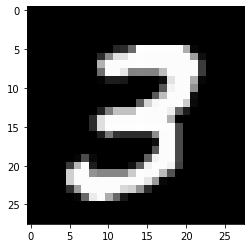

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train/8
x_train=x_train.reshape(60000,784)
print(x_train.shape)
# imshow(x_train[y_train==5][0].reshape(28,28),cmap='gray')
one=x_train[y_train==1][:40]
zto4=x_train[y_train%10<5]
zto4_n=y_train[y_train%10<5]
imshow(zto4[zto4_n==3][0].reshape(28,28),cmap='gray')
zto4_n

I [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
O [[0. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0.]]
U [[1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0.]]
(130, 25)


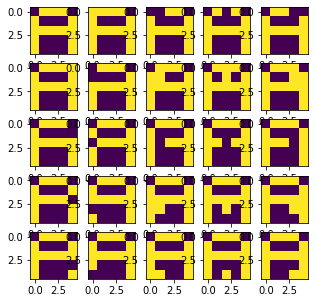

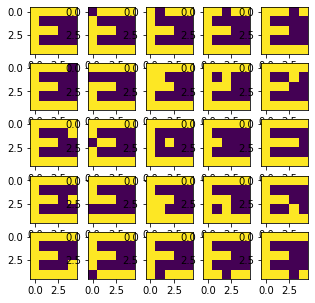

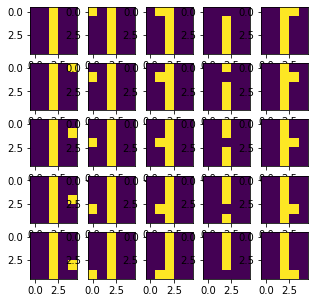

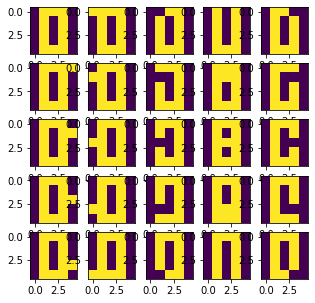

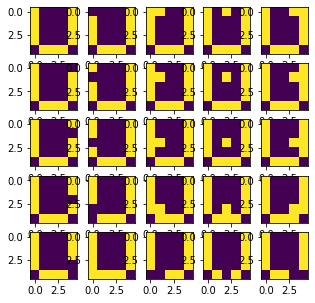

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# In[88]:


#generarte aplhabet A
A = np.zeros((5,5))
A[0,1]=A[0,2]=A[0,3]=A[1,0]=A[1,4]=A[2,:]=A[3,0]=A[3,4]=A[4,0]=A[4,4]=1 #yellow cells in the figure


# In[89]:


x_train = []
y_train = []
x_train.append(A)
y_train.append(0)
#flip one pixel at a time
for i in range(5):
    for j in range(5):
        nnew = A.copy()
        if(A[i,j]== 0):
          nnew[i,j] = 1
        else:
          nnew[i,j] = 0
        x_train.append(nnew)
        y_train.append(0)


# In[90]:


plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])  


# In[91]:


#to generate the alphabet E
E = np.zeros((5,5))
E[:,0]=E[0,:]=E[2,1]=E[2,2]=E[4,:] = 1


# In[92]:


x_train.append(E)
y_train.append(1)
for i in range(5):
    for j in range(5):
        Enew = E.copy()
        if(E[i,j]== 0):
          Enew[i,j] = 1
        else:
          Enew[i,j] = 0
        x_train.append(Enew)
        y_train.append(1)


# In[93]:


plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i+26]) 


# In[95]:


#to generate the alphabet I
I = np.zeros((5,5))
I[:,2]= 1
print("I",I)


# In[96]:


x_train.append(I)
y_train.append(2)
for i in range(5):
    for j in range(5):
        Inew = I.copy()
        if(I[i,j]== 0):
          Inew[i,j] = 1
        else:
          Inew[i,j] = 0
        x_train.append(Inew)
        y_train.append(2)


# In[97]:


plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i+52]) 


# In[98]:


#to generate the alphabet O
O = np.zeros((5,5))
O[:,1]=O[0,2]=O[:,3]=O[4,2]=1
print("O",O)


# In[99]:


x_train.append(O)
y_train.append(3)
for i in range(5):
    for j in range(5):
        Onew = O.copy()
        if(O[i,j]== 0):
          Onew[i,j] = 1
        else:
          Onew[i,j] = 0
        x_train.append(Onew)
        y_train.append(3)


# In[100]:


plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i+78]) 


# In[101]:


#to generate the alphabet U
U = np.zeros((5,5))
U[0:4,0]=U[0:4,4]=U[4,1:4]=1
print("U",U)


# In[102]:


x_train.append(U)
y_train.append(4)
for i in range(5):
    for j in range(5):
        Unew = U.copy()
        if(U[i,j]== 0):
          Unew[i,j] = 1
        else:
          Unew[i,j] = 0
        x_train.append(Unew)
        y_train.append(4)


# In[103]:


plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i+104]) 


# In[104]:


x_train = np.array(x_train)
y_train = np.array(y_train)
#print(x_train.shape)
xtrain_flat = x_train.reshape(x_train.shape[0],25)

from sklearn.utils import shuffle
x,y = shuffle(xtrain_flat,y_train)
print(x.shape)

In [ ]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=15,stratify=y)

In [ ]:
#Parameters

test_mode = False

num_examples = 115*5
ee_STDP_on = not test_mode

# record_spikes = True
n_input = x_tr.shape[1]
n = n_e = n_i = 25
single_example_time =   0.35 * second
resting_time = 0.15 *second
runtime = num_examples * (single_example_time + resting_time)
input_intensity = 100*Hz
update_interval = num_examples
weight_update_interval = 20
save_connections_interval = 10000

v_rest_e = -65. *mV  
v_rest_i = -60. *mV  
v_reset_e = -65. *mV  
v_reset_i = -45. *mV  
v_thresh_e = -52. *mV  
v_thresh_i = -40. *mV  
refrac_e = 5. *ms  
refrac_i = 2. *ms 

weight = {}
delay = {}
delay['input'] = (0*ms,10*ms)

start_input_intensity = input_intensity
tc_pre_ee = 20*ms
tc_post_1_ee = 20*ms
tc_post_2_ee = 40*ms

nu_ee_pre =  0.005      # learning rate
nu_ee_post = 0.01       # learning rate

wmax_ee = 1.0
exp_ee_pre = 0.2
exp_ee_post = exp_ee_pre
STDP_offset = 0.4
if test_mode:
  scr_e = 'v = v_reset_e; timer = 0*ms'
else:
  tc_theta = 1e7 *ms
  theta_plus_e = 0.05 *mV
  scr_e = 'v = v_reset_e; theta += theta_plus_e; timer = 0*ms'
offset = 20.0*mV
v_thresh_e_str = '(v>(theta - offset + v_thresh_e)) and (timer>refrac_e)'
v_thresh_i_str = 'v>v_thresh_i'
v_reset_i_str = 'v=v_reset_i'
neuron_eqs_e = '''
        dv/dt = ((v_rest_e - v) + (I_synE+I_synI) / nS) / (100*ms)  : volt (unless refractory)
        I_synE = ge * nS *         -v                           : amp
        I_synI = gi * nS * (-100.*mV-v)                          : amp
        dge/dt = -ge/(1.0*ms)                                   : 1
        dgi/dt = -gi/(2.0*ms)                                  : 1
        '''
if test_mode:
    neuron_eqs_e += '\n  theta      :volt'
else:
    neuron_eqs_e += '\n  dtheta/dt = -theta / (tc_theta)  : volt'
neuron_eqs_e += '\n  dtimer/dt = 0.1  : second'

neuron_eqs_i = '''
        dv/dt = ((v_rest_i - v) + (I_synE+I_synI) / nS) / (10*ms)  : volt (unless refractory)
        I_synE = ge * nS *         -v                           : amp
        I_synI = gi * nS * (-85.*mV-v)                          : amp
        dge/dt = -ge/(1.0*ms)                                   : 1
        dgi/dt = -gi/(2.0*ms)                                  : 1
        '''
eqs_stdp_ee = '''
                post2before                            : 1
                dpre/dt   =   -pre/(tc_pre_ee)         : 1 (event-driven)
                dpost1/dt  = -post1/(tc_post_1_ee)     : 1 (event-driven)
                dpost2/dt  = -post2/(tc_post_2_ee)     : 1 (event-driven)
            '''
eqs_stdp_pre_ee = 'pre = 1.; w = clip(w + nu_ee_pre * post1, 0, wmax_ee)'
eqs_stdp_post_ee = 'post2before = post2; w = clip(w + nu_ee_post * pre * post2before, 0, wmax_ee); post1 = 1.; post2 = 1.'

#STDP
model='w : 1'
pre_e = 'ge_post += w'
post_e=''
pre_i = 'gi_post +=w'
post_i=''

#Input
model_x='w : 1'
pre_x = 'ge_post += w'
post_x=''
if ee_STDP_on:
  model_x+=eqs_stdp_ee
  pre_x += '; ' + eqs_stdp_pre_ee
  post_x = eqs_stdp_post_ee


In [ ]:
#Netowrk
neuron_groups = {}
neuron_groups['e'] = NeuronGroup(n_e, neuron_eqs_e, threshold= v_thresh_e_str, refractory= refrac_e, reset= scr_e, method='euler')
neuron_groups['i'] = NeuronGroup(n_i, neuron_eqs_i, threshold= v_thresh_i_str, refractory= refrac_i, reset= v_reset_i_str, method='euler')

neuron_groups['e'].v = v_rest_e - 40. *mV
neuron_groups['i'].v = v_rest_i - 40. *mV

neuron_groups['e'].theta=np.ones((n_e)) * 20.0*mV

input_groups = {}
input_groups['X'] = PoissonGroup(n_input, 0*Hz)


connections = {}
connections['ei']=Synapses(neuron_groups['e'],neuron_groups['i'],model=model, on_pre=pre_e, on_post=post_e)
connections['ei'].connect(True)
weightMatrix_ei=10.4* np.eye(n)
connections['ei'].w=weightMatrix_ei.reshape([-1])

connections['ie']=Synapses(neuron_groups['i'],neuron_groups['e'],model=model, on_pre=pre_i, on_post=post_i)
connections['ie'].connect(True)
weightMatrix_ie=17.*(np.ones(n) - np.eye(n))
connections['ie'].w=weightMatrix_ie.reshape([-1])

connections['Xe']=Synapses(input_groups['X'],neuron_groups['e'],model=model_x, on_pre=pre_x, on_post=post_x)
connections['Xe'].connect(True)
minDelay = delay['input'][0]
maxDelay = delay['input'][1]
deltaDelay = maxDelay - minDelay
connections['Xe'].delay = 'minDelay + rand() * deltaDelay'

weightMatrix_x=0.35*np.random.rand(n_input*n_e)
connections['Xe'].w=weightMatrix_x

rate_monitors = {}
rate_monitors['e'] = PopulationRateMonitor(neuron_groups['e'])
rate_monitors['i'] = PopulationRateMonitor(neuron_groups['i'])
rate_monitors['X'] = PopulationRateMonitor(input_groups['X'])

spike_counters = {}
spike_counters['e'] = SpikeMonitor(neuron_groups['e'])

spike_monitors = {}
spike_monitors['e'] = SpikeMonitor(neuron_groups['e'])
spike_monitors['i'] = SpikeMonitor(neuron_groups['i'])

net=Network()
for obj_list in [neuron_groups, input_groups, connections, rate_monitors, spike_monitors, spike_counters]:
    for key in obj_list:
        net.add(obj_list[key])

In [ ]:
net.scheduling_summary()

object,part of,Clock dt,when,order,active
neurongroup_1_stateupdater (StateUpdater),neurongroup_1 (NeuronGroup),100. us (every step),groups,0,yes
neurongroup_stateupdater (StateUpdater),neurongroup (NeuronGroup),100. us (every step),groups,0,yes
neurongroup_1_thresholder (Thresholder),neurongroup_1 (NeuronGroup),100. us (every step),thresholds,0,yes
neurongroup_thresholder (Thresholder),neurongroup (NeuronGroup),100. us (every step),thresholds,0,yes
poissongroup_thresholder (Thresholder),poissongroup (PoissonGroup),100. us (every step),thresholds,0,yes
spikemonitor (SpikeMonitor),spikemonitor (SpikeMonitor),100. us (every step),thresholds,1,yes
spikemonitor_1 (SpikeMonitor),spikemonitor_1 (SpikeMonitor),100. us (every step),thresholds,1,yes
spikemonitor_2 (SpikeMonitor),spikemonitor_2 (SpikeMonitor),100. us (every step),thresholds,1,yes
synapses_1_pre (SynapticPathway),synapses_1 (Synapses),100. us (every step),synapses,-1,yes
synapses_2_pre (SynapticPathway),synapses_2 (Synapses),100. us (every step),synapses,-1,yes


In [ ]:
#Simulation
previous_spike_count = np.zeros(n_e)
input_groups['X'].rates = 0 * Hz
net.run(0*second)


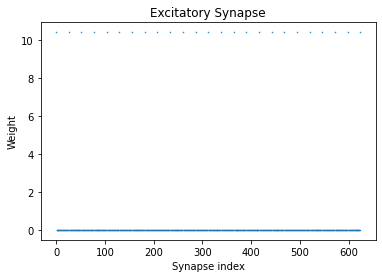

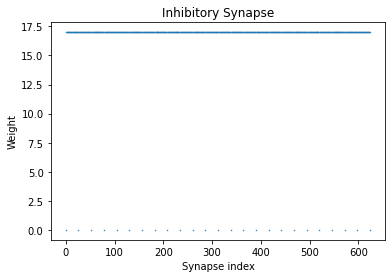

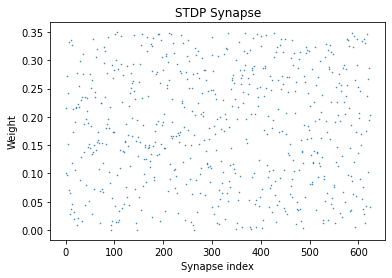

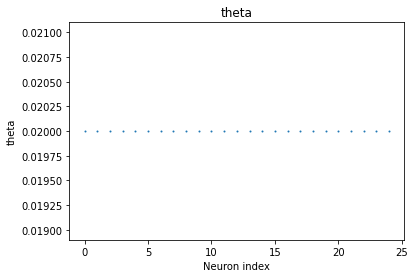

In [ ]:
plot(connections['ei'].w,'.',markersize = 1)
xlabel('Synapse index')
ylabel('Weight')
title("Excitatory Synapse");
show()
plot(connections['ie'].w,'.',markersize = 1)
xlabel('Synapse index')
ylabel('Weight')
title("Inhibitory Synapse");
show()
plot(connections['Xe'].w,'.',markersize = 1)
xlabel('Synapse index')
ylabel('Weight')
title("STDP Synapse");
show()
plot(neuron_groups['e'].theta,'.',markersize = 2)
xlabel('Neuron index')
ylabel('theta')
title("theta");
show()

In [ ]:
def normalize_weights():
    p = 0.5
    STDP_Weight = connections['Xe'].w
    mat = STDP_Weight.get_item(range(STDP_Weight.shape[0])).reshape([n_input, n_e])
    connections['Xe'].w = (mat/np.mean(mat, axis = 0).reshape([1, n_e])).reshape([n_input*n_e]) * p * 0.8

In [ ]:
tr=0
while tr <num_examples:
  normalize_weights()
  spike_rates=x_tr[tr%115,:] * input_intensity
  input_groups['X'].rates = spike_rates
  print(tr, end =" ")
  net.run(single_example_time, report='text')
  input_groups['X'].rates = 0*Hz
  net.run(resting_time)
  current_spike_count = np.asarray(spike_counters['e'].count[:]) - previous_spike_count
  previous_spike_count = np.copy(spike_counters['e'].count[:])
  if np.sum(current_spike_count) < 5:
      input_intensity += 50* Hz
      input_groups['X'].rates = 0 * Hz
      net.run(resting_time)
  else:
    input_intensity = start_input_intensity
    # if (tr%30==0):
    #   plot(connections['Xe'].w,'.',markersize = 1)
    #   xlabel('Synapse index')
    #   ylabel('Weight')
    #   title("STDP Synapse");
    #   show()
    tr += 1

0 Starting simulation at t=0. s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
1 Starting simulation at t=0.5 s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
2 Starting simulation at t=1. s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
3 Starting simulation at t=1.5 s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
4 Starting simulation at t=2. s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
4 Starting simulation at t=2.65 s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
5 Starting simulation at t=3.15 s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
6 Starting simulation at t=3.65 s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
7 Starting simulation at t=4.15 s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
7 Starting simulation at t=4.8 s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
7 Starting simulation at t=5.45 s for a duration of 0.35 s
0.35 s (100%) simulated in 1s
8 Starting simulation at t=5.9

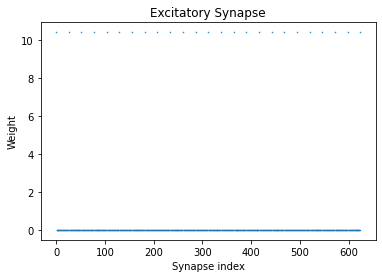

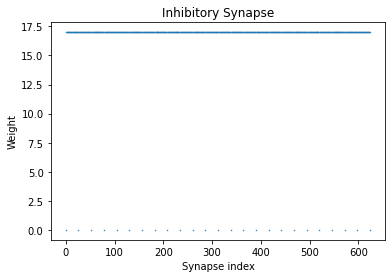

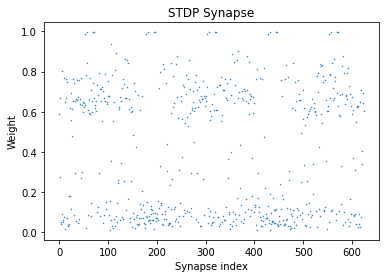

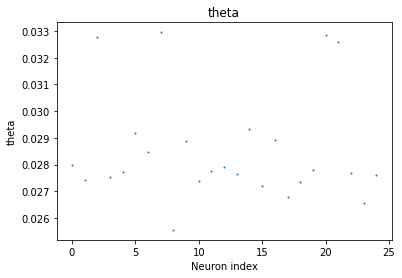

In [ ]:
plot(connections['ei'].w,'.',markersize = 1)
xlabel('Synapse index')
ylabel('Weight')
title("Excitatory Synapse");
show()
plot(connections['ie'].w,'.',markersize = 1)
xlabel('Synapse index')
ylabel('Weight')
title("Inhibitory Synapse");
show()
plot(connections['Xe'].w,'.',markersize = 1)
xlabel('Synapse index')
ylabel('Weight')
title("STDP Synapse");
show()
plot(neuron_groups['e'].theta,'.',markersize = 2)
xlabel('Neuron index')
ylabel('theta')
title("theta");
show()

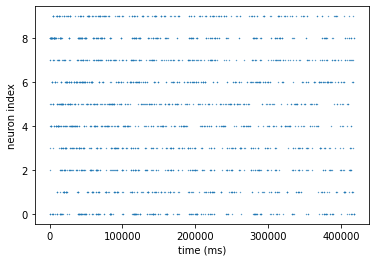

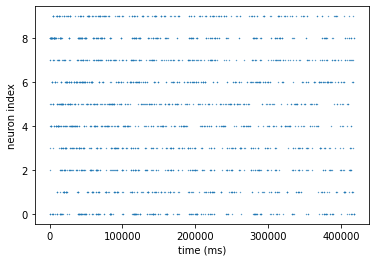

In [ ]:
brian_plot(spike_monitors['e'],markersize = 0.7)
show()
brian_plot(spike_monitors['i'],markersize = 0.7)

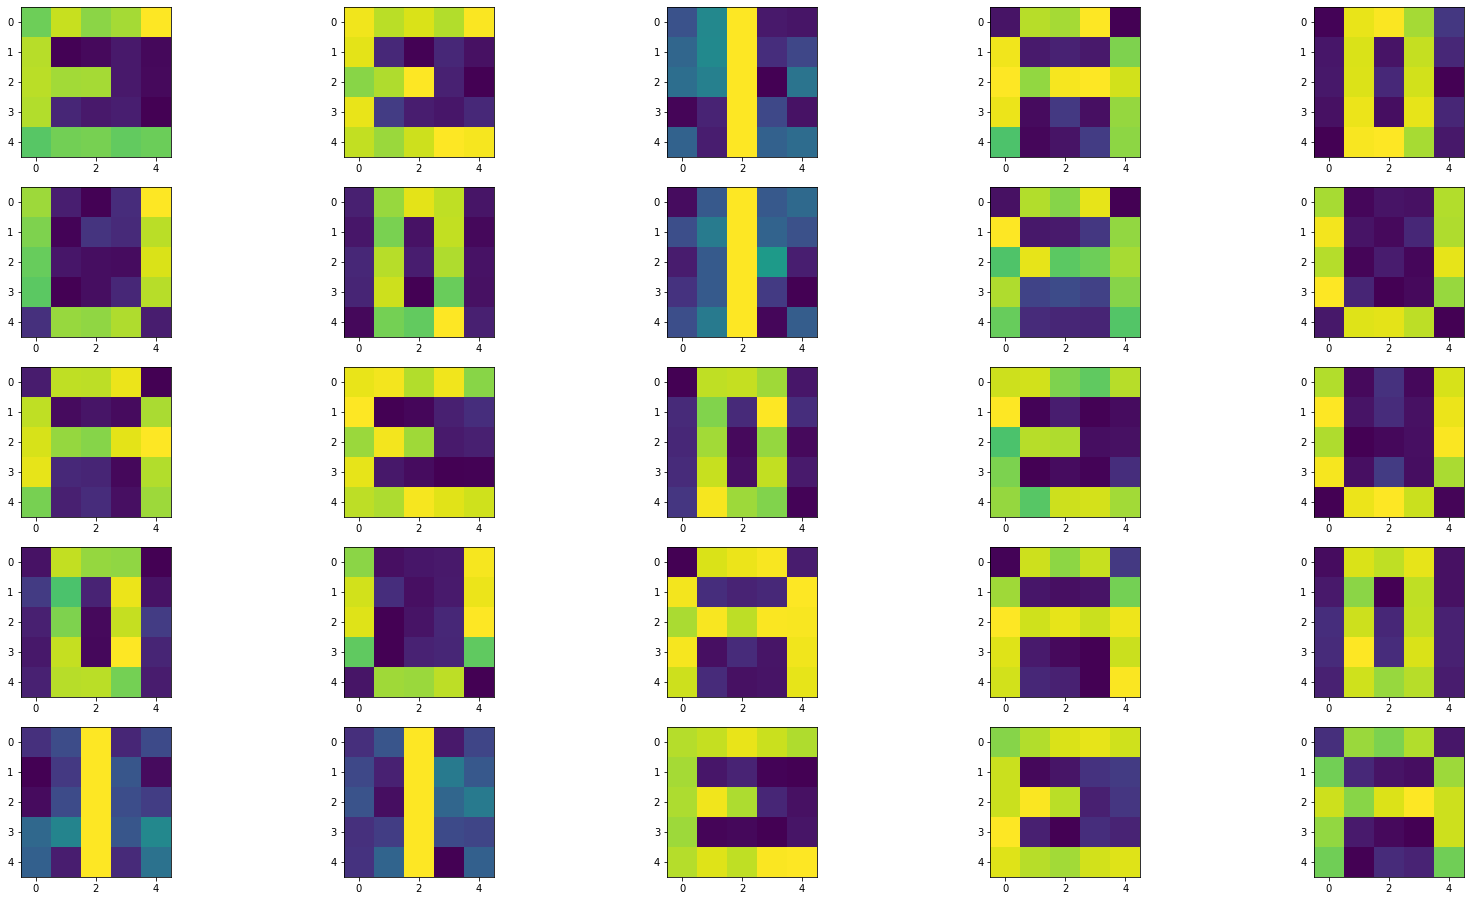

In [ ]:
#trained
STDP_Weight = connections['Xe'].w
figure(figsize=(28.0, 16.0))
W = STDP_Weight.get_item(range(STDP_Weight.shape[0])).reshape([n_input, n_e])
for i in range(n_e):
    subplot(5,5,i+1)
    imshow(W[:,i].reshape(5, 5))

In [ ]:
#test weights
c_n=zeros((num_examples,n_e))
test_weight=tuple(STDP_Weight)
test_theta=(neuron_groups['e'].theta)

In [ ]:
save("/content/drive/MyDrive/Colab Notebooks/vowels_w5.npy",STDP_Weight)
save("/content/drive/MyDrive/Colab Notebooks/vowels_theta5.npy",test_theta)

(625,)


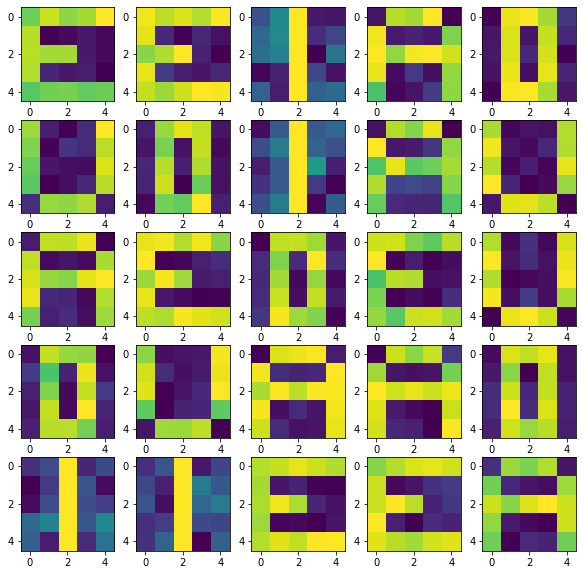

In [ ]:
we=load("/content/drive/MyDrive/Colab Notebooks/vowels_w5.npy")
print(we.shape)
figure(figsize=(10.0, 10.0))
W = we.reshape([n_input, n_e])
for i in range(n_e):
    subplot(5,5,i+1)
    imshow(W[:,i].reshape(5, 5))

In [ ]:
eye={}
eye['A']=[3,8,10,17,18,24]
eye['E']=[0,1,11,13,22,23]
eye['I']=[2,7,20,21]
eye['O']=[4,6,12,15,19]
eye['U']=[5,9,14,16]

##Classifying

In [ ]:
start_scope()
#Parameters

n_input = x_tr.shape[1]
single_example_time =   0.35 * second
resting_time = 0.15 *second
runtime = num_examples * (single_example_time + resting_time)
input_intensity = 100*Hz
update_interval = num_examples
weight_update_interval = 20
save_connections_interval = 10000
v_rest_e = -65. *mV  
v_rest_i = -60. *mV  
v_reset_e = -65. *mV  
v_reset_i = -45. *mV  
v_thresh_e = -52. *mV  
v_thresh_i = -40. *mV  
refrac_e = 5. *ms  
refrac_i = 2. *ms 

weight = {}
delay = {}
delay['input'] = (0*ms,10*ms)

start_input_intensity = input_intensity
tc_pre_ee = 20*ms
tc_post_1_ee = 20*ms
tc_post_2_ee = 40*ms

exp_ee_pre = 0.2
exp_ee_post = exp_ee_pre
STDP_offset = 0.4
scr_e = 'v = v_reset_e; timer = 0*ms'
offset = 20.0*mV
v_thresh_e_str = '(v>(theta - offset + v_thresh_e)) and (timer>refrac_e)'
v_thresh_i_str = 'v>v_thresh_i'
v_reset_i_str = 'v=v_reset_i'
neuron_eqs_e = '''
        dv/dt = ((v_rest_e - v) + (I_synE+I_synI) / nS) / (100*ms)  : volt (unless refractory)
        I_synE = ge * nS *         -v                           : amp
        I_synI = gi * nS * (-100.*mV-v)                          : amp
        dge/dt = -ge/(1.0*ms)                                   : 1
        dgi/dt = -gi/(2.0*ms)                                  : 1
        '''
neuron_eqs_e += '\n  theta      :volt'
neuron_eqs_e += '\n  dtimer/dt = 0.1  : second'

neuron_eqs_i = '''
        dv/dt = ((v_rest_i - v) + (I_synE+I_synI) / nS) / (10*ms)  : volt (unless refractory)
        I_synE = ge * nS *         -v                           : amp
        I_synI = gi * nS * (-85.*mV-v)                          : amp
        dge/dt = -ge/(1.0*ms)                                   : 1
        dgi/dt = -gi/(2.0*ms)                                  : 1
        '''
eqs_stdp_ee = '''
                post2before                            : 1
                dpre/dt   =   -pre/(tc_pre_ee)         : 1 (event-driven)
                dpost1/dt  = -post1/(tc_post_1_ee)     : 1 (event-driven)
                dpost2/dt  = -post2/(tc_post_2_ee)     : 1 (event-driven)
            '''

#STDP
model='w : 1'
pre_e = 'ge_post += w'
post_e=''
pre_i = 'gi_post +=w'
post_i=''

#Input
model_x='w : 1'
pre_x = 'ge_post += w'
post_x=''

In [ ]:
#Netowrk
neuron_groups = {}
neuron_groups['e'] = NeuronGroup(n_e, neuron_eqs_e, threshold= v_thresh_e_str, refractory= refrac_e, reset= scr_e, method='euler')
neuron_groups['i'] = NeuronGroup(n_i, neuron_eqs_i, threshold= v_thresh_i_str, refractory= refrac_i, reset= v_reset_i_str, method='euler')

neuron_groups['e'].v = v_rest_e - 40. *mV
neuron_groups['i'].v = v_rest_i - 40. *mV
neuron_groups['e'].theta=load('/content/drive/MyDrive/Colab Notebooks/vowels_theta5.npy')*mV

input_groups = {}
input_groups['X'] = PoissonGroup(n_input, 0*Hz)


connections = {}
connections['ei']=Synapses(neuron_groups['e'],neuron_groups['i'],model=model, on_pre=pre_e, on_post=post_e)
connections['ei'].connect(True)
weightMatrix_ei=10.4* np.eye(n)
connections['ei'].w=weightMatrix_ei.reshape([-1])

connections['ie']=Synapses(neuron_groups['i'],neuron_groups['e'],model=model, on_pre=pre_i, on_post=post_i)
connections['ie'].connect(True)
weightMatrix_ie=17.*(np.ones(n) - np.eye(n))
connections['ie'].w=weightMatrix_ie.reshape([-1])

connections['Xe']=Synapses(input_groups['X'],neuron_groups['e'],model=model_x, on_pre=pre_x, on_post=post_x)
connections['Xe'].connect(True)
minDelay = delay['input'][0]
maxDelay = delay['input'][1]
deltaDelay = maxDelay - minDelay
connections['Xe'].delay = 'minDelay + rand() * deltaDelay'
connections['Xe'].w=load('/content/drive/MyDrive/Colab Notebooks/vowels_w5.npy')
rate_monitors = {}
rate_monitors['e'] = PopulationRateMonitor(neuron_groups['e'])
rate_monitors['i'] = PopulationRateMonitor(neuron_groups['i'])
rate_monitors['X'] = PopulationRateMonitor(input_groups['X'])

spike_counters = {}
spike_counters['e'] = SpikeMonitor(neuron_groups['e'])

spike_monitors = {}
spike_monitors['e'] = SpikeMonitor(neuron_groups['e'])
spike_monitors['i'] = SpikeMonitor(neuron_groups['i'])
vol=StateMonitor(neuron_groups['e'],'v',record=True)
tnet=Network()
for obj_list in [neuron_groups, input_groups, connections, rate_monitors, spike_monitors, spike_counters]:
    for key in obj_list:
        tnet.add(obj_list[key])
tnet.add(vol)
tnet.store()

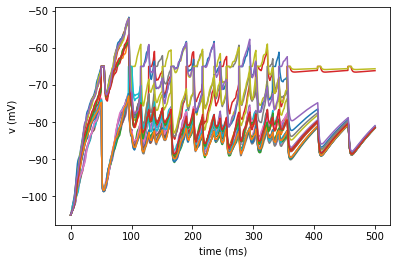

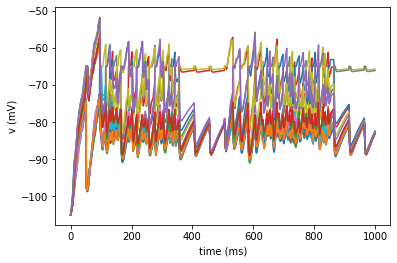

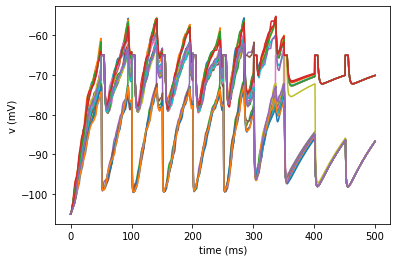

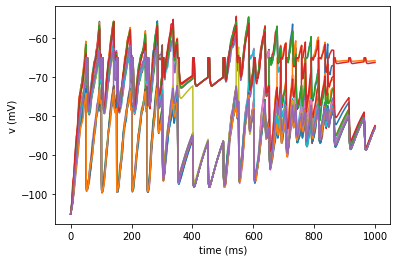

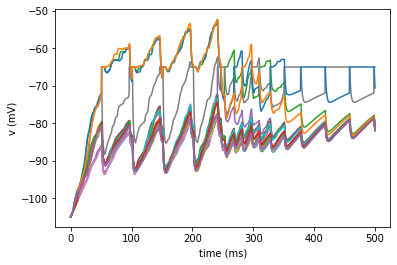

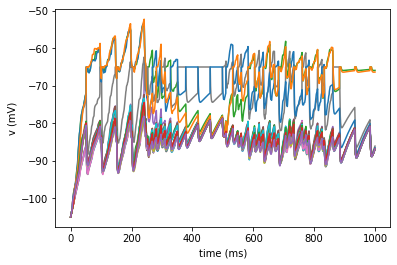

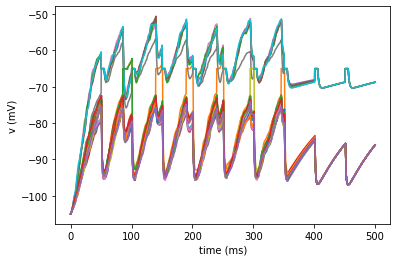

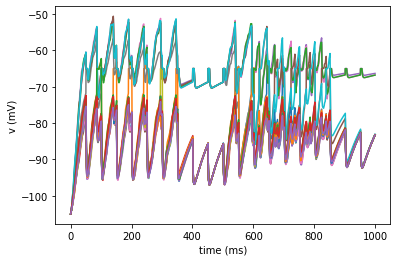

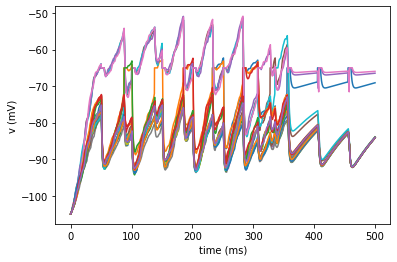

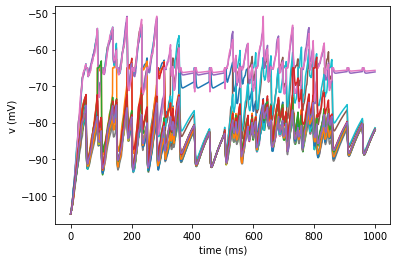

[[18]
 [13]
 [ 2]
 [ 4]
 [14]]


In [ ]:
no=1
acc=zeros((5,no), dtype=int64)
# figure(figsize=(30, 6.0))
for j in range(5):
  for k in range(no):
    tnet.restore()
    for i in range(2):
      spike_rates = x_tr[y_tr==j][k] * input_intensity
      input_groups['X'].rates = spike_rates
      tnet.run(single_example_time)

      # rest input
      input_groups['X'].rates = 0*Hz
      tnet.run(resting_time)
      brian_plot(vol)
      show()
      # print(spike_counters['e'].i)
    if (spike_counters['e'].i):
      acc[j][k]=(np.bincount(spike_counters['e'].i).argmax())
    else:
      acc[j][k]=26
    # subplot(1,5,j+1)
    # plt.title(t);
    # brian_plot(tspike_counters['e'],markersize=1)
print(acc)

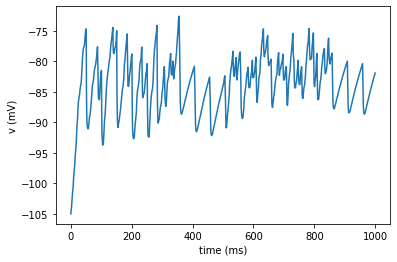

In [ ]:
brian_plot(vol[10])

In [ ]:
classi={}
classi['A']=unique(acc[0])
classi['E']=unique(acc[1])
classi['I']=unique(acc[2])
classi['O']=unique(acc[3])
classi['U']=unique(acc[4])
for key in classi:
  classi[key]=list(classi[key])
  print("For "+str(key)+ ", Classifier Neurons are "+ str(classi[key]))

For A, Classifier Neurons are [8, 10]
For E, Classifier Neurons are [1, 22, 23]
For I, Classifier Neurons are [2, 7, 21, 26]
For O, Classifier Neurons are [4, 6, 12, 15, 19]
For U, Classifier Neurons are [5, 9, 14, 16]


In [ ]:
for key in eye:
  print("Neurons' weights that look like "+str(key)+ ", are "+ str(eye[key]))

Neurons' weights that look like A, are [3, 8, 10, 17, 18, 24]
Neurons' weights that look like E, are [0, 1, 11, 13, 22, 23]
Neurons' weights that look like I, are [2, 7, 20, 21]
Neurons' weights that look like O, are [4, 6, 12, 15, 19]
Neurons' weights that look like U, are [5, 9, 14, 16]


In [ ]:
v=['A','E','I','O','U']
for i in range(5):
  n=bincount(acc[i]).argmax()
  f=bincount(acc[i])[bincount(acc[i]).argmax()]
  t="For "+str(v[i])+", Neuron no.= "+str(n)+" and accuracy= "+str(double(f/no))
  print(t)

For A, Neuron no.= 8 and accuracy= 0.7391304347826086
For E, Neuron no.= 23 and accuracy= 0.5652173913043478
For I, Neuron no.= 26 and accuracy= 0.9565217391304348
For O, Neuron no.= 4 and accuracy= 0.34782608695652173
For U, Neuron no.= 9 and accuracy= 0.6956521739130435


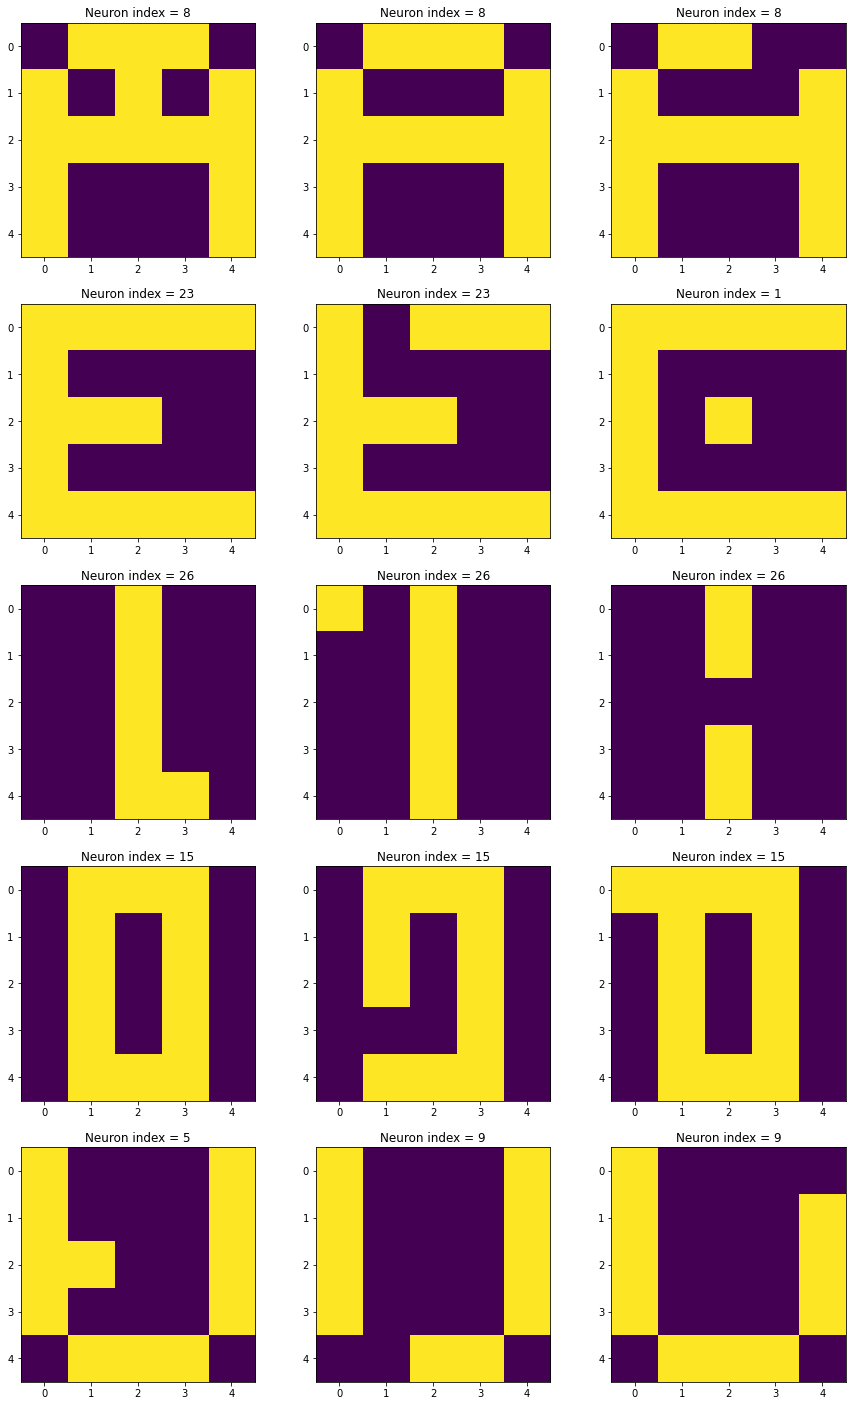

In [ ]:
figure(figsize=(15.0, 25.0))
p=1
for inp in range(5):
  for d in range(3):
    tnet.restore()
    for i in range(2):
      spike_rates = x_test[y_test==inp][d] * input_intensity
      input_groups['X'].rates = spike_rates
      tnet.run(single_example_time)

      # rest input
      input_groups['X'].rates = 0*Hz
      tnet.run(resting_time)
    if (spike_counters['e'].i):
      tit=np.bincount(spike_counters['e'].i).argmax()
    else:
      tit=26
    subplot(5,3,p)
    p+=1
    title("Neuron index = " +str(tit));
    imshow(x_test[y_test==inp][d].reshape(5, 5))